In [1]:
import scipy.io
file_path="houston_data.mat"
mat = scipy.io.whosmat(file_path)
print(mat)


[('hsi', (349, 1905, 144), 'uint16'), ('lidar', (349, 1905), 'single'), ('test', (349, 1905), 'uint8'), ('train', (349, 1905), 'uint8')]


In [2]:
import scipy.io


# Load the .mat file using scipy
mat_data = scipy.io.loadmat(file_path)

# Print available keys in the dataset
print(mat_data.keys())

# Access data
hsi_data = mat_data['hsi']     # Shape: (349, 1905, 144)
lidar_data = mat_data['lidar'] # Shape: (349, 1905)
test_data = mat_data['test']   # Shape: (349, 1905)
train_data = mat_data['train'] # Shape: (349, 1905)


dict_keys(['__header__', '__version__', '__globals__', 'hsi', 'lidar', 'test', 'train'])


In [4]:
import numpy as np
print(np.unique(test_data))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


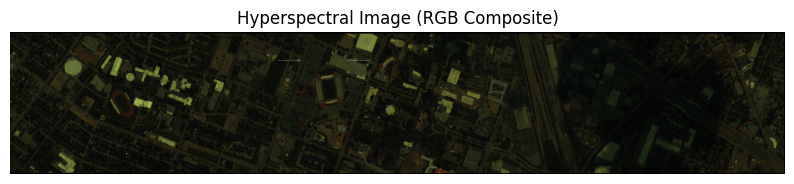

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the dataset
# mat_data = scipy.io.loadmat(file_path)

# Extract Hyperspectral Data (H, W, Bands) -> (349, 1905, 144)
hsi_data = mat_data['hsi']

# Normalize and Select Bands (R=60, G=30, B=10)
rgb_image = np.stack([
    hsi_data[:, :, 60],  # Red
    hsi_data[:, :, 30],  # Green
    hsi_data[:, :, 10]   # Blue
], axis=-1)

# Normalize between 0 and 1
rgb_image = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(rgb_image)
plt.title("Hyperspectral Image (RGB Composite)")
plt.axis("off")
plt.show()


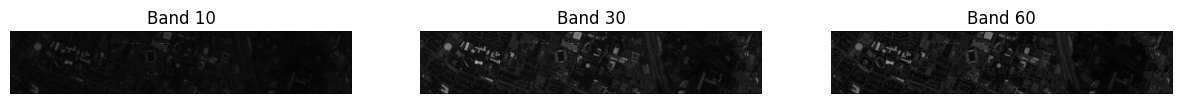

In [7]:
plt.figure(figsize=(15, 5))
for i, band in enumerate([10, 30, 60]):  # Choose 3 bands
    plt.subplot(1, 3, i + 1)
    plt.imshow(hsi_data[:, :, band], cmap='gray')
    plt.title(f"Band {band}")
    plt.axis("off")

plt.show()


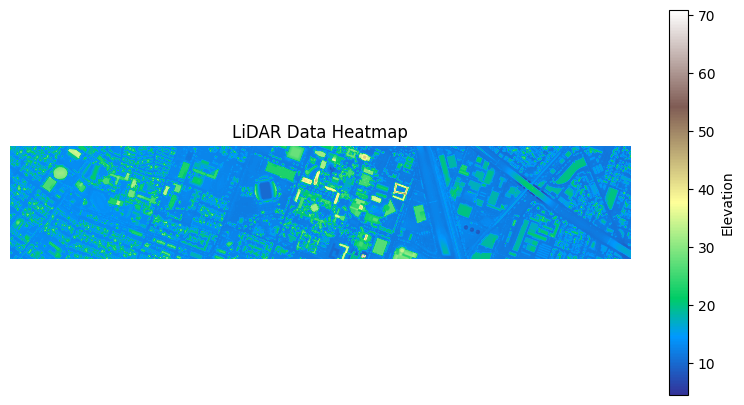

In [8]:
lidar_data = mat_data['lidar']

plt.figure(figsize=(10, 5))
plt.imshow(lidar_data, cmap='terrain')
plt.colorbar(label="Elevation")
plt.title("LiDAR Data Heatmap")
plt.axis("off")
plt.show()


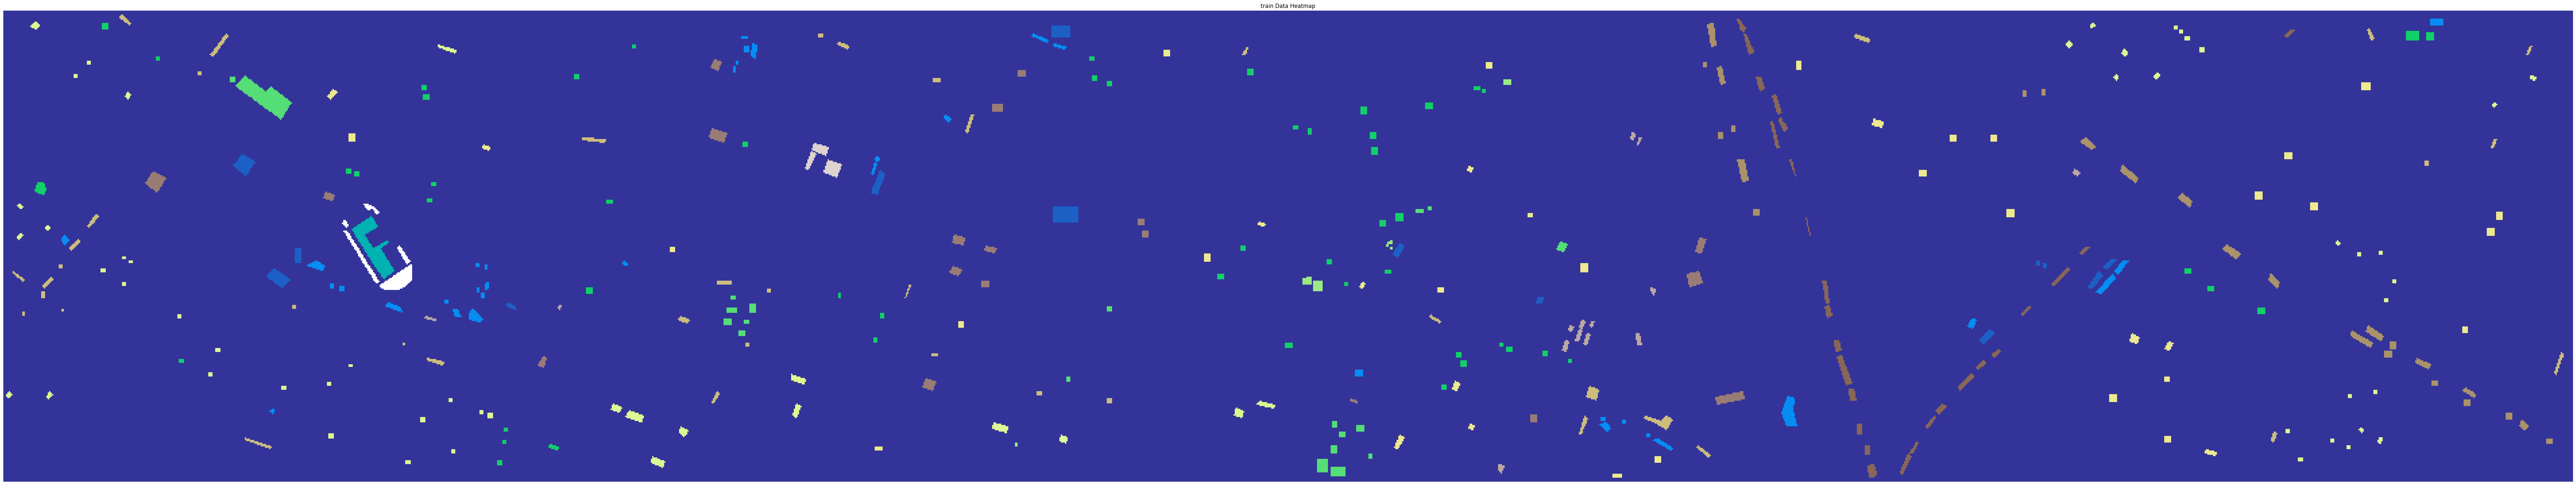

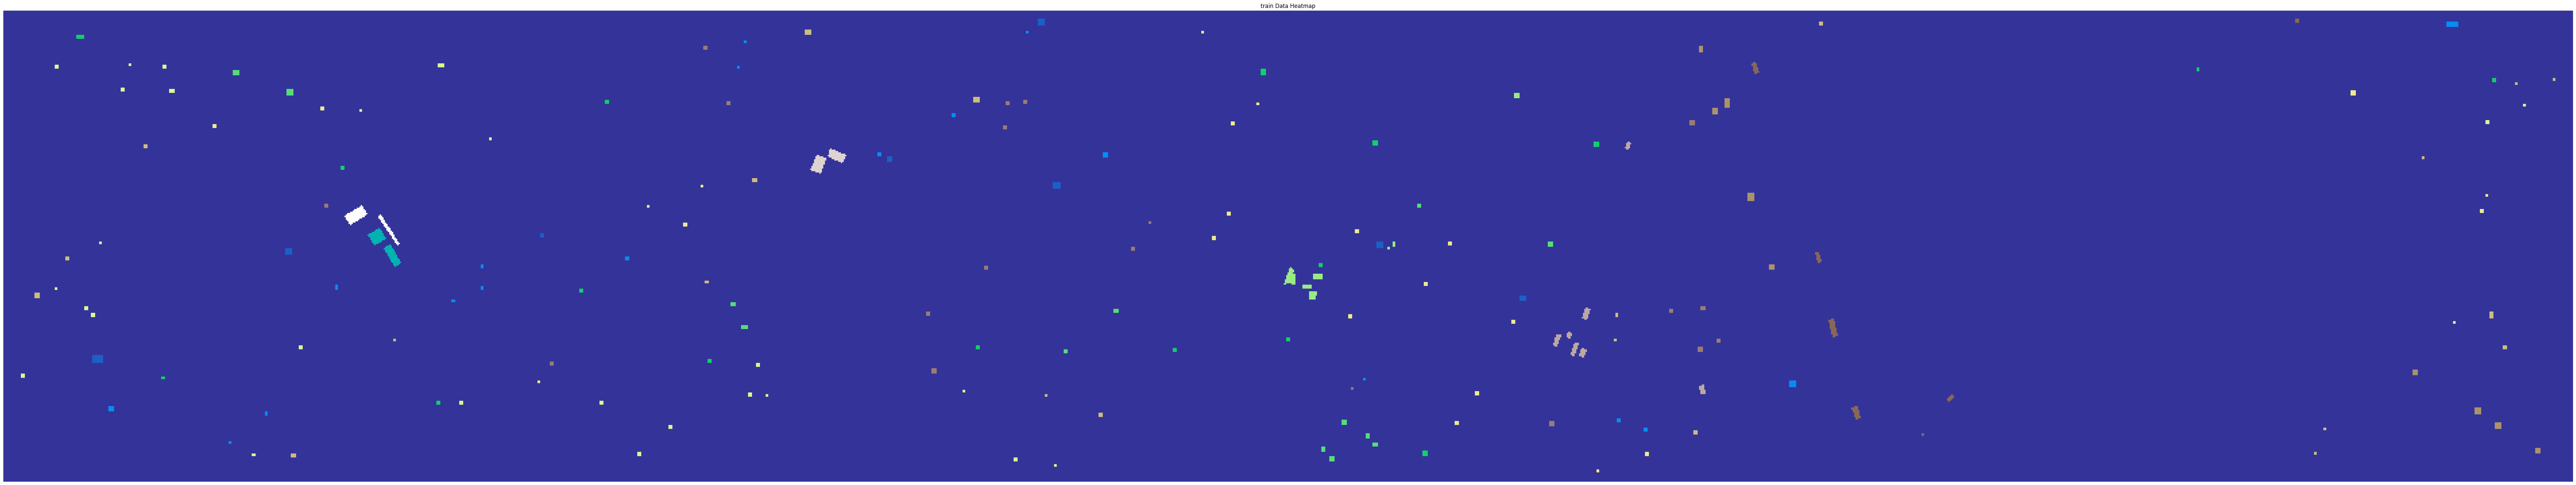

In [20]:
test_data = mat_data['test']

plt.figure(figsize=(100, 50))
plt.imshow(test_data, cmap='terrain')
# plt.colorbar(label="Elevation")
plt.title("train Data Heatmap")
plt.axis("off")
plt.show()

train_data = mat_data['train']

plt.figure(figsize=(100, 50))
plt.imshow(train_data, cmap='terrain')
# plt.colorbar(label="Elevation")
plt.title("train Data Heatmap")
plt.axis("off")
plt.show()


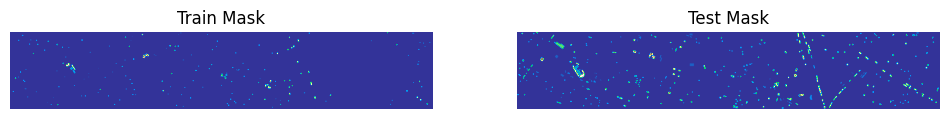

In [19]:
train_mask = mat_data['train']
test_mask = mat_data['test']

plt.figure(figsize=(12, 5))

# Train Mask
plt.subplot(1, 2, 1)
plt.imshow(train_mask, cmap='terrain')
plt.title("Train Mask")
plt.axis("off")

# Test Mask
plt.subplot(1, 2, 2)
plt.imshow(test_mask, cmap='terrain')
plt.title("Test Mask")
plt.axis("off")

plt.show()


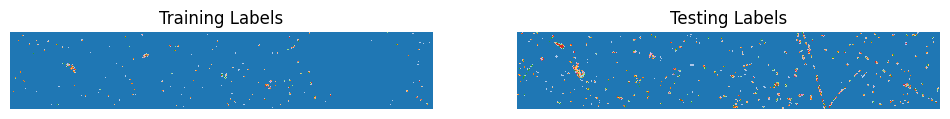

In [13]:
plt.figure(figsize=(12, 5))

# Training Mask
plt.subplot(1, 2, 1)
plt.imshow(train_mask, cmap='tab20')
plt.title("Training Labels")
plt.axis("off")

# Testing Mask
plt.subplot(1, 2, 2)
plt.imshow(test_mask, cmap='tab20')
plt.title("Testing Labels")
plt.axis("off")

plt.show()


In [1]:
import h5py

with h5py.File("houston_data.mat", "r") as f:
    print(list(f.keys()))  # Shows available keys


OSError: Unable to synchronously open file (file signature not found)

In [5]:
with h5py.File("Houston18_7gt.mat", "r") as f:
    print(list(f.keys()))  # Shows available keys


['map']


In [6]:
import h5py
import numpy as np

# Open the file and check the shape of ori_data
with h5py.File("Houston18_7gt.mat", "r") as f:
    ori_data = np.array(f['map'])
    print(f"Shape of ori_data: {ori_data.shape}")


Shape of ori_data: (954, 210)


Ground Truth Shape: (954, 210)


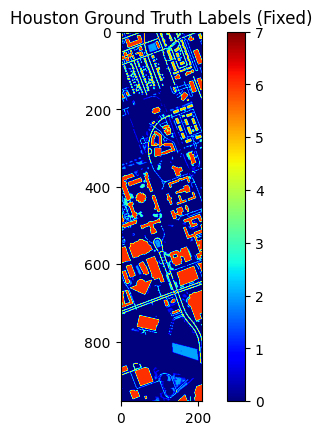

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Load the ground truth labels
with h5py.File("Houston18_7gt.mat", "r") as f:
    gt_key = list(f.keys())[0]  # Get first available key
    ground_truth = np.array(f["map"])

print(f"Ground Truth Shape: {ground_truth.shape}")

plt.imshow(ground_truth, cmap='jet')
plt.title("Houston Ground Truth Labels (Fixed)")
plt.colorbar()
plt.show()


In [16]:
import numpy as np

# Ensure full array output without truncation
np.set_printoptions(threshold=np.inf)

print(ground_truth[:10,:10])

[[6. 0. 0. 0. 0. 0. 7. 0. 0. 0.]
 [6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [6. 6. 0. 0. 0. 0. 0. 7. 0. 0.]
 [6. 6. 0. 0. 0. 0. 0. 7. 0. 0.]
 [6. 6. 0. 0. 0. 0. 0. 0. 0. 0.]
 [6. 6. 6. 0. 0. 0. 0. 0. 7. 0.]
 [6. 6. 6. 0. 0. 0. 0. 0. 7. 0.]
 [6. 6. 6. 6. 0. 0. 0. 0. 0. 7.]
 [6. 6. 6. 6. 0. 0. 0. 0. 0. 7.]
 [6. 6. 6. 6. 0. 0. 0. 0. 0. 0.]]


In [2]:
import h5py
import numpy as np

# Open the file and check the shape of ori_data
with h5py.File("Houston18.mat", "r") as f:
    ori_data = np.array(f['ori_data'])
    print(f"Shape of ori_data: {ori_data.shape}")


Shape of ori_data: (48, 954, 210)


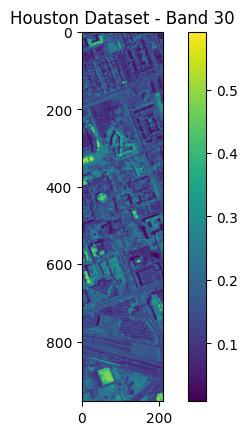

In [3]:
import matplotlib.pyplot as plt

# Display one spectral band (e.g., Band 30)
plt.imshow(ori_data[30, :,:])
plt.title("Houston Dataset - Band 30")
plt.colorbar()
plt.show()


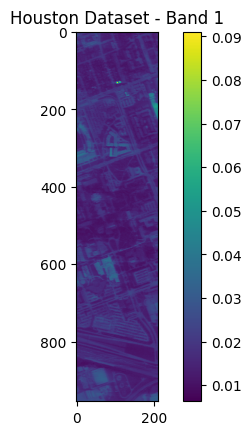

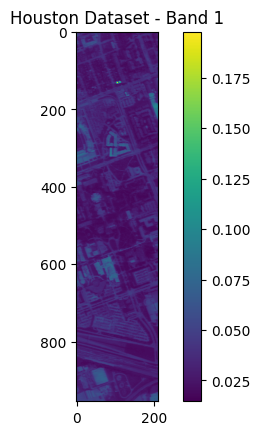

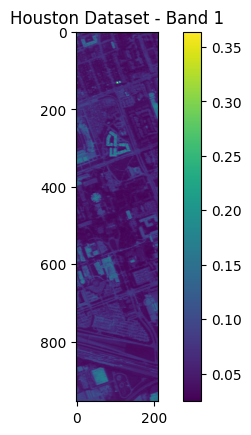

In [4]:
for i in range(3):
    plt.imshow(ori_data[i, :,:])
    plt.title("Houston Dataset - Band 1")
    plt.colorbar()
    plt.show()


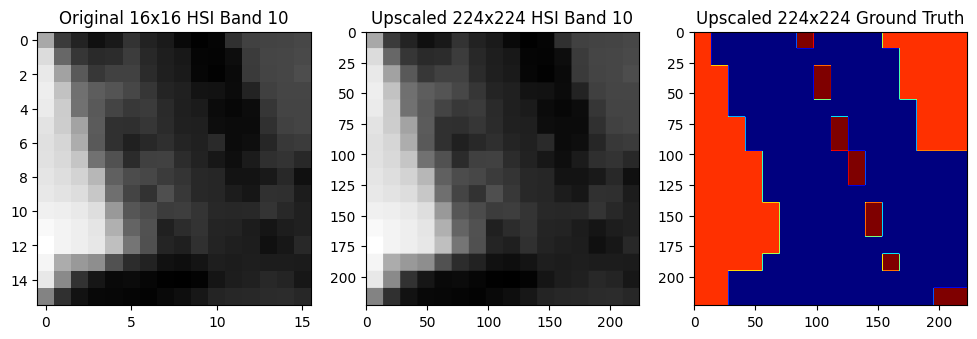

In [20]:
import h5py
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load HSI and ground truth data
with h5py.File("Houston18.mat", "r") as f:
    ori_data = np.array(f['ori_data'])  # (48, 954, 210)

with h5py.File("Houston18_7gt.mat", "r") as f:
    gt_data = np.array(f['map'])  # (954, 210)

# Convert HSI to shape (954, 210, 48)
hsi_data = np.transpose(ori_data, (1, 2, 0))  # (H, W, C)

# Extract a 16x16 patch from HSI and ground truth
hsi_patch = hsi_data[:16, :16, :]  # Shape (16, 16, 48)
gt_patch = gt_data[:16, :16]  # Shape (16, 16)

# ✅ Convert to PyTorch tensors for interpolation
hsi_tensor = torch.tensor(hsi_patch, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)  # (1, 48, 16, 16)
gt_tensor = torch.tensor(gt_patch, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 16, 16)

# ✅ Upscale HSI patch (bilinear interpolation) & GT patch (nearest-neighbor interpolation)
hsi_resized = F.interpolate(hsi_tensor, size=(224, 224), mode='nearest').squeeze(0)  # (48, 224, 224)
gt_resized = F.interpolate(gt_tensor, size=(224, 224), mode='nearest').squeeze(0).squeeze(0).long()  # (224, 224)

# ✅ Select a single spectral band to visualize from HSI (e.g., Band 10)
hsi_band_index = 10
hsi_band_original = hsi_patch[:, :, hsi_band_index]  # (16, 16)
hsi_band_resized = hsi_resized[hsi_band_index].numpy()  # (224, 224)

# ✅ Plot all results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(hsi_band_original, cmap="gray")
plt.title("Original 16x16 HSI Band 10")

plt.subplot(1, 3, 2)
plt.imshow(hsi_band_resized, cmap="gray")
plt.title("Upscaled 224x224 HSI Band 10")

plt.subplot(1, 3, 3)
plt.imshow(gt_resized.numpy(), cmap="jet")
plt.title("Upscaled 224x224 Ground Truth")

plt.show()


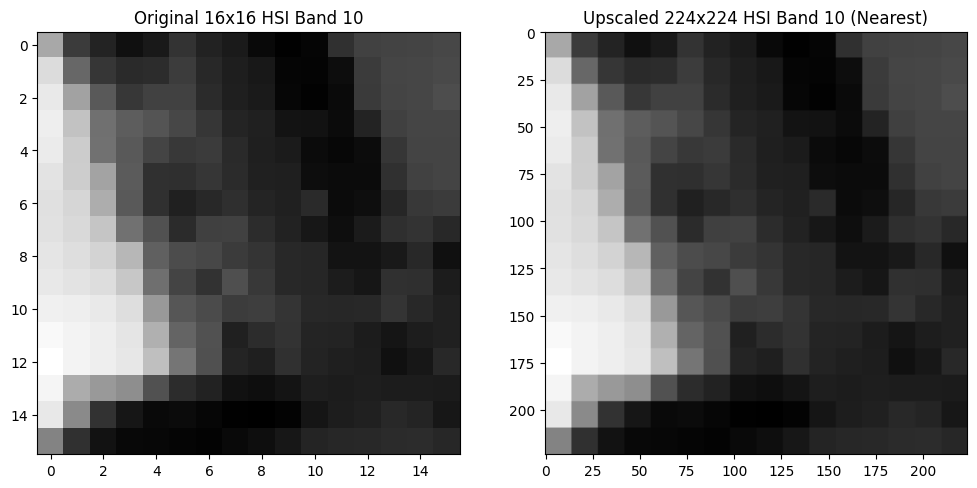

In [13]:
import h5py
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load HSI data
with h5py.File("Houston18.mat", "r") as f:
    ori_data = np.array(f['ori_data'])  # (48, 954, 210)

# Convert HSI to shape (954, 210, 48)
hsi_data = np.transpose(ori_data, (1, 2, 0))  # (H, W, C)

# Extract a 16x16 patch from HSI
hsi_patch = hsi_data[:16, :16, :]  # (16, 16, 48)

# ✅ Convert to PyTorch tensor
hsi_tensor = torch.tensor(hsi_patch, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)  # (1, 48, 16, 16)

# ✅ Resize using nearest-neighbor interpolation (Pixel Duplication)
hsi_resized = F.interpolate(hsi_tensor, size=(224, 224), mode='nearest').squeeze(0)  # (48, 224, 224)

# ✅ Select a spectral band to visualize (e.g., Band 10)
hsi_band_index = 10
hsi_band_original = hsi_patch[:, :, hsi_band_index]  # (16, 16)
hsi_band_resized = hsi_resized[hsi_band_index].numpy()  # (224, 224)

# ✅ Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(hsi_band_original, cmap="gray")
plt.title("Original 16x16 HSI Band 10")

plt.subplot(1, 2, 2)
plt.imshow(hsi_band_resized, cmap="gray")
plt.title("Upscaled 224x224 HSI Band 10 (Nearest)")

plt.show()


In [32]:
with h5py.File("Houston18.mat", "r") as f:
            # ori_data is stored as (bands, height, width) = (48, 954, 210)
            ori_data = np.array(f['ori_data'])
with h5py.File("Houston18_7gt.mat", "r") as f:
            # Ground truth segmentation mask of shape (954, 210)
            gt_data = np.array(f['map'])

hsi_data = np.transpose(ori_data, (1, 2, 0))  # (954, 210, 48)

# Normalize the HSI data (min-max normalization)
hsi_data = (hsi_data - hsi_data.min()) / (hsi_data.max() - hsi_data.min())

# Convert ground truth to integer type.
# Assume ground truth is 1-indexed for labeled pixels and 0 for unlabeled.
gt_data = gt_data.astype(np.int64)


patch_size = 8# spatial patch size (before resizing)

def extract_patches(hsi, gt, patch_size):
    H, W, C = hsi.shape
    patches = []
    patch_labels = []
    stride = patch_size  # non-overlapping
    for i in range(0, H - patch_size + 1, stride):
        for j in range(0, W - patch_size + 1, stride):
            hsi_patch = hsi[i:i+patch_size, j:j+patch_size, :]  # (patch_size, patch_size, C)
            gt_patch = gt[i:i+patch_size, j:j+patch_size]         # (patch_size, patch_size)
            patches.append(hsi_patch)
            patch_labels.append(gt_patch)
    return patches, patch_labels

patches, patch_labels = extract_patches(hsi_data, gt_data, patch_size)
print("Number of patches:", len(patches))

# ---------------------------------------------
# 3. Define Resize Functions for Image and Label Patches
# ---------------------------------------------
def resize_img_tensor(img_tensor, size=(224, 224)):
    img_tensor = img_tensor.unsqueeze(0)  # (1, C, H, W)
    img_tensor = F.interpolate(img_tensor, size=size, mode='bilinear', align_corners=False)
    return img_tensor.squeeze(0)

def resize_label_tensor(label_tensor, size=(224, 224)):
    label_tensor = label_tensor.unsqueeze(0).unsqueeze(0).float()  # (1, 1, H, W)
    label_tensor = F.interpolate(label_tensor, size=size, mode='nearest')
    return label_tensor.squeeze(0).squeeze(0).long()

# ---------------------------------------------
# 4. Create a Custom Dataset Class
# ---------------------------------------------
class HoustonHSIDataset(Dataset):
    def __init__(self, patches, patch_labels):
        self.patches = patches
        self.patch_labels = patch_labels

    def len(self):
        return len(self.patches)

    def getitem(self, idx):
        # Convert patch and label to torch tensors.
        patch = self.patches[idx]  # shape: (patch_size, patch_size, channels)
        label = self.patch_labels[idx]  # shape: (patch_size, patch_size)
        patch_tensor = torch.tensor(patch, dtype=torch.float32).permute(2, 0, 1)
        # Subtract 1 from label so that labels become 0-indexed.
        label_tensor = torch.tensor(label, dtype=torch.long) - 1

        # Resize to 224x224.
        patch_tensor = resize_img_tensor(patch_tensor, size=(224, 224))
        label_tensor = resize_label_tensor(label_tensor, size=(224, 224))
        return patch_tensor, label_tensor

#dataset = HoustonHSIDataset(patches, patch_labels)

Number of patches: 3094


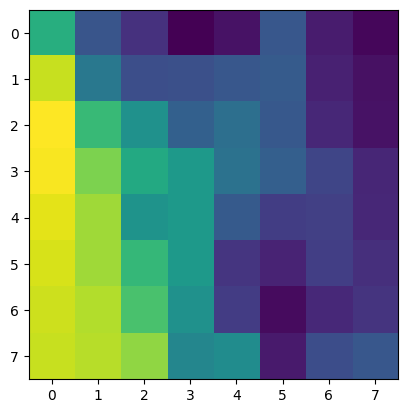

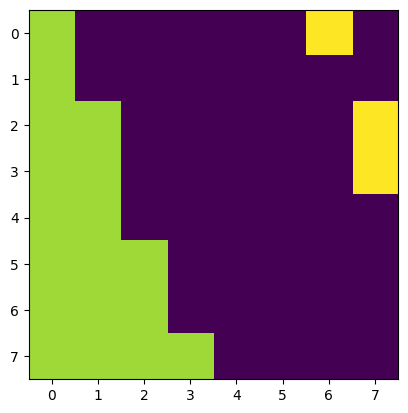

In [45]:
#plt.show(patches[0][:,:,30].numpy())
patch1=patches[0]
lab1=patch_labels[0]
plt.imshow(patch1[:,:,40])
plt.show()
plt.imshow(lab1)

#plt.imshow(patches[0][1].numpy()[:, :])

In [33]:
dataset = HoustonHSIDataset(patches, patch_labels)

In [35]:
dataset.len()

3094

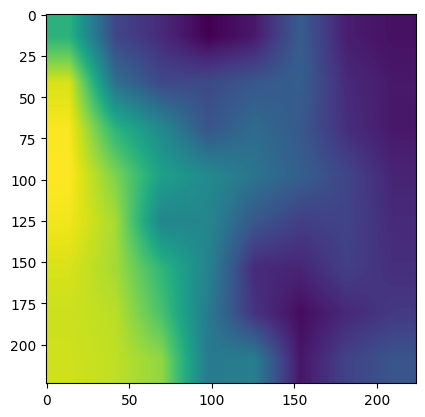

In [38]:
im1=dataset.getitem(0)
plt.imshow(im1[0].permute(1, 2, 0).numpy()[:, :, 30])
plt.show()
